<a href="https://colab.research.google.com/github/JeremyHugentobler/ada-exam/blob/main/Homework%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basics of Image Formation

In [1]:
import os
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
!git clone https://github.com/IVRL/CS413-ComputationalPhotography-Spring2025.git
%cd "CS413-ComputationalPhotography-Spring2025/Homework 1 Basics Image Formation"

Cloning into 'CS413-ComputationalPhotography-Spring2025'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 57 (delta 4), reused 48 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (57/57), 35.90 MiB | 10.87 MiB/s, done.
Resolving deltas: 100% (4/4), done.
/content/CS413-ComputationalPhotography-Spring2025/Homework 1 Basics Image Formation


In [3]:
from helper import plot_spectrum

## Illuminants

Perfectly white light has equal power in all wavelengths of light. In reality, light sources have non-uniform spectral power distributions, i.e., they vary in the amount of power they emit at different wavelengths $\lambda$.

We provide you 4 files, `A.npy`, `D50.npy`, `D65.npy`, `F2.npy`.
These files contain the spectral power distribution $E(\lambda)$ of various light sources.

In [4]:
!ls illuminants/

A.npy  D50.npy	D65.npy  F2.npy


Those files can be loaded as follow:

In [5]:
illuminant_d65 = np.load(os.path.join('illuminants', 'D65.npy'))

The array `illuminant` contains two columns. The first column specifies a wavelength $\lambda$ (in $nm$) and the second column specifies the relative power $E(\lambda)$ measured at that wavelength.

We print the five first rows of this array:

In [6]:
print(illuminant_d65[:5, :])

[[3.00000000e+02 2.89444199e-04]
 [3.01000000e+02 3.05690422e-03]
 [3.02000000e+02 5.82436424e-03]
 [3.03000000e+02 8.59182426e-03]
 [3.04000000e+02 1.13592843e-02]]


In the file `helpers.py`, we provide a function `plot_spectrum(x, y, ylabel)`. `x` and `y` must be two 1-dimensional arrays corresponding to the grid of wavelengths $\lambda$ and corresponding relative power values $E(\lambda)$.

Fill in the code below to plot the spectral power distribution of the light source D65.

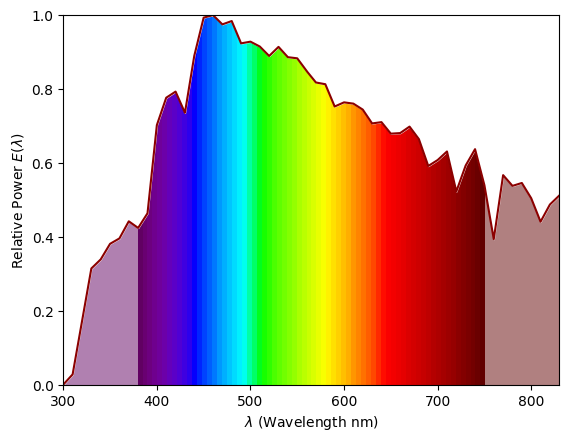

In [7]:
x = illuminant_d65[:, 0]
y = illuminant_d65[:, 1]
plot_spectrum(x, y, ylabel='Relative Power $E(\lambda)$')

In the plot you obtain, you can see the correspondence between wavelength and the _perceived_ color of light. Note that light sources often emit light at wavelengths outside the visible spectrum, i.e., $\lambda<380$ or $\lambda>740$.

Fill in the code below to plot the 3 other spectral power distributions.

_Note:_ the provided spectral power distributions may differ in the grid of wavelengths measured.

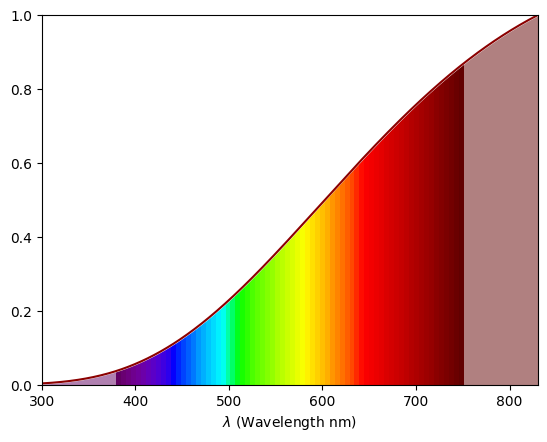

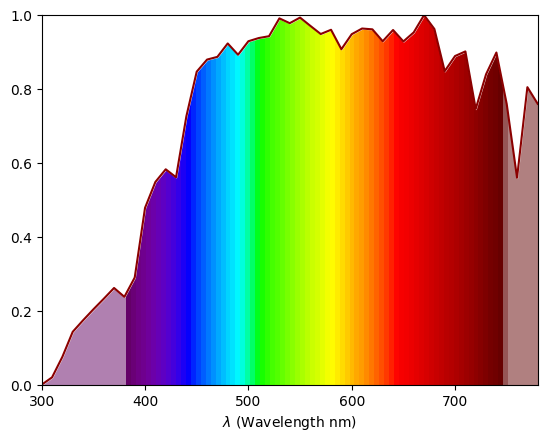

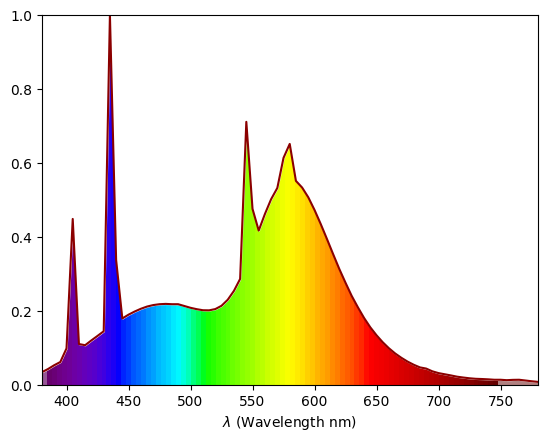

In [8]:
for light_source in ["A", "D50", "F2"]:
    filepath = os.path.join('illuminants', f'{light_source}.npy')
    ill = np.load(filepath)
    x = ill[:,0]
    y = ill[:, 1]
    plot_spectrum(x,y)
    plt.show()

Which types of light sources do A, D50, D65, and F2 correspond to?

_Hint_: https://en.wikipedia.org/wiki/Standard_illuminant

Your answer: ...

## Reflectance

The color of a (non-transparent) object is characterized by its surface reflectance $S(λ)$, ($S(λ) ∈ [0, 1])$.

For each wavelength or wavelength interval, a reflectance factor indicates how  much of the incoming radiation is reflected.

By shining a white light on an object, its reflectance can be measured at various wavelengths.


We provide you 2 files, `CDREF31_persilcolour.npy` and `CDREF31_unclebens.npy`.

These files contain _hyperspectral_ images, i.e., measurements of reflectance at various wavelengths.

In [ ]:
!ls reflectance_images/

Those files can be loaded as follow:

In [ ]:
spectral_image = np.load(os.path.join('reflectance_images', 'CDREF31_persilcolour.npy'))

What is the shape of the array `spectral_image`? What does each dimension correspond to?
How many pixels does the image have? At how many wavelengths the reflectance was measured?

In [ ]:
# ... Write your code here

Your answer: ...

What is the minimal and maximal value stored in `spectral_image`? Does it make sense to you?

In [ ]:
# ... Write your code here

Your answer: ...

To get an idea of the object being photographed, visualize below the average intensity, averaged over all wavelengths.

In [ ]:
plt.figure(figsize=(7,6))
# average_intensity = ... Hint: It must be a 2D array with the same spatial dimensions as `spectral_image`
plt.imshow(average_intensity,  vmin=0., vmax=1., cmap='Greys_r')

By choosing a specific pixel location $x$, you can visualize the relative reflectance $S(x, \lambda)$ along the spectrum at that position (e.g., $x=(50,130)$):

In [ ]:
wavelengths = np.arange(400,710,10)
reflectance_spectrum = spectral_image[:,50,130]
plot_spectrum(wavelengths, reflectance_spectrum, ylabel='Reflectance factor $S(x, \lambda)$')

Now, show the reflectance spectra $S(x, \lambda)$ for the following pixel locations:

$x = (40, 15)$;
$x = (227, 296)$;
$x = (100, 125)$ and
$x = (36, 100)$.

In [ ]:
for pixel_location in [(40, 15), (227, 296), (100, 125), (36, 100)]:
    plt.figure()
    # x = ... Write your code here
    # y = ... Write your code here
    # ... Plot the spectrum

Based on those reflectance spectra, try to guess the color of those pixels.

Your answer: ...

## Sensors

The perception of light is enabled by photo-sensitive sensors, which respond to light by emitting an electric charge. The strength of this response varies by wavelength, and is characterized by the _sensitivity_ of the sensor, $R(\lambda)$.

We provide you 2 files, `cone_sensitivity.npy` and `camera_sensitivity.npy`.

The file `cone_sensitivity.npy` contains the sensitivities of the 3 types of cones in the Human Vision.

The file `camera_sensitivity.npy` contains the sensitivities of the 3 channels R, G and B, of the camera sensor (including filters).

### Camera

The silicon-based camera sensor is placed behind a filter which allows only certain wavelengths to go through. These filters (of which, uncoincidentally there are 3) correspond largely to <b>R</b>ed, <b>G</b>reen, <b>B</b>lue. `camera_sensitivity` has 3 columns, each corresponding to the sensitivity of the sensor when placed behind a different filter, measured at various wavelengths:


In [ ]:
wavelengths = np.arange(400,710,10)
camera_sensitivity = np.load(os.path.join("sensitivities", 'camera_sensitivity.npy'))
print(wavelengths.shape, camera_sensitivity.shape)

These sensitivity curves are shown below:

In [ ]:
wavelengths = np.arange(400,710,10)
plt.figure(figsize=(15,4))
for i, channel in enumerate(('R', 'G', 'B')):
    plt.subplot(1,3,i+1)
    plot_spectrum(wavelengths, camera_sensitivity[:,i], ylabel='Sensitivity' if i==0 else None)
    plt.title(channel)

### Human Vision System

#### Cones sensitivity

The _cone_ cells of the human eye system are of three distinct types, distinguished by their sensitivity.

In [ ]:
wavelengths = np.arange(400,710,10)
cone_sensitivity = np.load(os.path.join("sensitivities", 'cone_sensitivity.npy'))
print(wavelengths.shape, camera_sensitivity.shape)

`cone_sensitivity` has 3 columns, corresponding to the sensitivity of each type of cone: <b>L</b>ong, <b>M</b>edium, and <b>S</b>hort. The names of these types of cones indicate the wavelength of maximal response. Fill in the code below to plot the sensitivity of the 3 types cone cells:

In [ ]:
plt.figure(figsize=(15,4))
for i, channel in enumerate(('L', 'M', 'S')):
    plt.subplot(1,3,i+1)
    #... Plot the spectrum
    plt.title(channel)

#### Color matching functions $\bar{x}$, $\bar{y}$, $\bar{z}$

Before researchers understood the biology of the _cone_ cells of the human eye system, they conducted in 1931 color matching experiments and therefore the CIE 1931 XYZ color space was introduced as an average observer sensitivity.  Those color matching functions $\bar{x}(\lambda)$, $\bar{y}(\lambda)$ and $\bar{z}(\lambda)$ are used today as idealized basic functions (primaries) for different color encodings.


In [ ]:
cie_xyz = np.genfromtxt(os.path.join("sensitivities", 'ciexyz31_1.csv'), delimiter=',')
wavelengths = cie_xyz[:, 0]
xyz_sensitivity = cie_xyz[:, 1:4]
print(wavelengths.shape, xyz_sensitivity.shape)

Those 3 color matching functions can be thought of as sensitivity curves:

In [ ]:
plt.figure(figsize=(15,4))
for i, channel in enumerate((r'$\bar{x}$', r'$\bar{y}$', r'$\bar{z}$')):
    plt.subplot(1,3,i+1)
    plot_spectrum(wavelengths, xyz_sensitivity[:,i], ylabel='"Sensitivity"' if i==0 else None)
    plt.title(channel)

## Image formation

The final color response $\rho_\kappa$ of a sensor $\kappa$ with sensitivity $R_\kappa(\lambda)$ in response to light reflecting off a point $x$ with reflectance $S(x, \lambda)$, under a light source with spectral power distribution $E(\lambda)$ is:

$\rho_\kappa= \int_\lambda R(\lambda)S(x, \lambda)E(\lambda)~d\lambda$

Note that this model of the color response considers an integral over a continuous spectrum. In practice, however, the response is computed discretely, by summing over $\lambda$ over a sampling grid $\Lambda$. $\rho_\kappa$ is also normalized so that $\text{max}_{\kappa\in\text{sensors}}(\rho_\kappa)=1$. This leads to:

$\rho_\kappa= n \sum_{\lambda\in\Lambda} R(\lambda)S(x, \lambda)E(\lambda)~~~$
for $\Lambda = \{400 + i\cdot10 | 0\leq i\leq 30, i\in\mathcal{N}\}$

where $n$ is a normalization factor.

Fill in the code below to compute the RGB image for the loaded spectral image and illuminant.

### Image in LMS Color Space

Now we want to form an image using the cone sensitivities to aggregate different wavelengths

Fill in the code below to compute the RGB image for the loaded spectral image and illuminant.


In [ ]:
wavelengths = np.arange(400,710,10)
cone_sensitivity = np.load(os.path.join("sensitivities", 'cone_sensitivity.npy'))
spectral_image = np.load(os.path.join('reflectance_images', 'CDREF31_persilcolour.npy'))
illuminant = np.load(os.path.join('illuminants', 'D65.npy'))
illuminant = illuminant[np.isin(illuminant[:,0], wavelengths), 1]
print(wavelengths.shape, camera_sensitivity.shape, spectral_image.shape, illuminant.shape)

In [ ]:
# ...
# rho_L = ... Write your code here
# rho_M = ... Write your code here
# rho_S = ... Write your code here
# ...

result_LMS = np.stack((rho_L, rho_M, rho_S)).transpose(1, 2, 0)
n = 1/result_LMS.max() # normalization factor n
result_LMS *= n

print("Normalization Factor = ", n)

assert result_LMS.shape == (256, 336, 3)

`result_LMS` is now a valid RGB image and can be visualized:

In [ ]:
plt.figure(figsize=(21,6))
for i, channel in enumerate(('R', 'G', 'B')):
    plt.subplot(1,3,i+1)
    plt.imshow(result_LMS[:,:,i],  vmin=0., vmax=1., cmap='Greys_r')
    plt.title(channel)

plt.figure(figsize=(7,6))
plt.imshow(result_LMS, vmin=0., vmax=1.)

### Image in RGB Color Space

Now we want to form an image using the camera sensitivities to aggregate different wavelengths

Fill in the code below to compute the RGB image for the loaded spectral image and illuminant.

In [ ]:
wavelengths = np.arange(400,710,10)
camera_sensitivity = np.load(os.path.join("sensitivities", 'camera_sensitivity.npy'))
spectral_image = np.load(os.path.join('reflectance_images', 'CDREF31_persilcolour.npy'))
illuminant = np.load(os.path.join('illuminants', 'D65.npy'))
illuminant = illuminant[np.isin(illuminant[:,0], wavelengths), 1]
print(wavelengths.shape, camera_sensitivity.shape, spectral_image.shape, illuminant.shape)

In [ ]:
# ...
# rho_R = ... Write your code here
# rho_G = ... Write your code here
# rho_B = ... Write your code here
# ...

result_RGB = np.stack((rho_R, rho_G, rho_B)).transpose(1, 2, 0)
n = 1/result_RGB.max() # normalization factor n
result_RGB *= n

print("Normalization Factor = ", n)

assert result_RGB.shape == (256, 336, 3)

Question: Why is the normalization factor for RGB color space is bigger than the normalization factor for LMS color space?

Your answer:

`result_RGB` is now a valid RGB image and can be visualized:

In [ ]:
plt.figure(figsize=(21,6))
for i, channel in enumerate(('R', 'G', 'B')):
    plt.subplot(1,3,i+1)
    plt.imshow(result_RGB[:,:,i],  vmin=0., vmax=1., cmap='Greys_r')
    plt.title(channel)

plt.figure(figsize=(7,6))
plt.imshow(result_RGB, vmin=0., vmax=1.)

A little dark? That is because we have yet to apply gamma-correction, to compensate for how computer monitors interpret RGB values.


In [ ]:
plt.figure(figsize=(7,6))
plt.imshow(result_RGB**(1/2.2), vmin=0., vmax=1.)

Question: Why do the colors look very different between the images formed using cone sensitivities and the camera sensitivities? Explain the difference.

Your answer:


### Image in CIE 1931 XYZ color space

Fill in the code below to visualize the image in CIE 1931 XYZ color space.

In [ ]:
wavelengths = np.arange(400,710,10)
cie_xyz = np.genfromtxt(os.path.join("sensitivities", 'ciexyz31_1.csv'), delimiter=',')
xyz_sensitivity = cie_xyz[np.isin(cie_xyz[:,0], wavelengths), 1:4]
spectral_image = np.load(os.path.join("reflectance_images", 'CDREF31_persilcolour.npy'))
illuminant = np.load(os.path.join('illuminants', 'D65.npy'))
illuminant = illuminant[np.isin(illuminant[:,0], wavelengths), 1]
print(wavelengths.shape, xyz_sensitivity.shape, spectral_image.shape, illuminant.shape)

In [ ]:
# ...
# rho_X = ... Write your code here
# rho_Y = ... Write your code here
# rho_Z = ... Write your code here.
# ...

result_XYZ = np.stack((rho_X, rho_Y, rho_Z)).transpose(1, 2, 0)
n = 1/result_XYZ.max() # normalization factor n
result_XYZ *= n
assert result_XYZ.shape == (256, 336, 3)

In [ ]:
plt.figure(figsize=(21,6))
for i, channel in enumerate(('R', 'G', 'B')):
    plt.subplot(1,3,i+1)
    plt.imshow(result_XYZ[:,:,i],  vmin=0., vmax=1., cmap='Greys_r')
    plt.title(channel)

plt.figure(figsize=(7,6))
plt.imshow(result_XYZ, vmin=0., vmax=1.)

Question: Explain the color difference between the images formed using RGB camera sensitivities and XYZ sensitivities.

Your answer:

### Image in sRGB and CIE L\*a\*b\* color spaces

If you computed the image correctly in the CIE 1931 XYZ color space, the code below should display the image in sRGB and CIE L\*a\*b\* color spaces.

In [ ]:
from skimage.color import xyz2rgb, rgb2lab
RGBresult  = xyz2rgb(result_XYZ)
LABresult = rgb2lab(RGBresult)

In [ ]:
plt.figure(figsize=(21,6))
for i, channel in enumerate(('R', 'G', 'B')):
    plt.subplot(1,3,i+1)
    plt.imshow(RGBresult[:,:,i], vmin=0., vmax=1., cmap='Greys_r')
    plt.title(channel)

plt.figure(figsize=(7,6))
plt.imshow(RGBresult)

In [ ]:
plt.figure(figsize=(21,6))
for i, channel in enumerate(('L*', 'a*', 'b*')):
    plt.subplot(1,3,i+1)
    plt.imshow(LABresult[:,:,i], cmap='Greys_r')
    plt.title(channel)